# Police shootings

Датасет содержит основные данные о людях, такие как их: 
Имя, возраст, пол, раса
Дата события и где это произошло, при каких обстоятельствах? 
Было ли нападение? 
Выявили ли какое-либо психическое заболевание? 
Была ли у полицейского камера/происшествие было записано? 
Подозреваемый скрылся? 
Кроме того, в столбце категории указан тип оружия, которым пользовался подозреваемый.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv("police shootings.csv")

In [4]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,7725,NaN,2022-09-07,shot,screwdriver,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False,-111.584,35.224,True
7725,7726,NaN,2022-09-07,shot,gun,NaN,M,W,Springville,AL,False,attack,Car,False,-86.472,33.775,True
7726,7727,NaN,2022-09-07,shot,knife,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False,-90.290,38.668,True
7727,7728,Tyler Michael Gardner,2022-09-07,shot,gun,27.0,M,NaN,Washington County,TN,False,attack,Other,False,-82.539,36.309,True


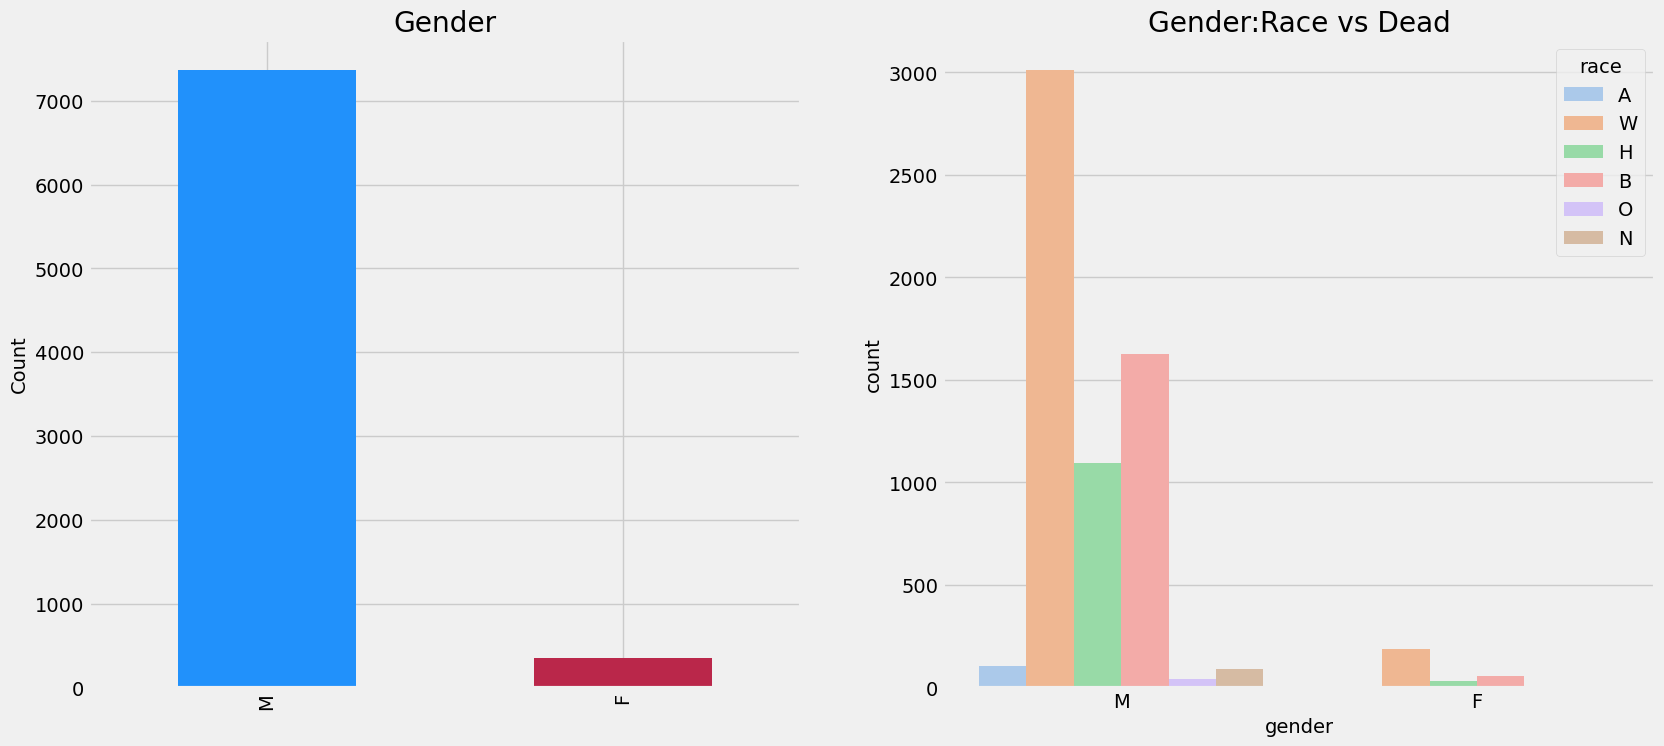

In [5]:
# color=['#2B2D42', '#8D99AE', '#EDF2F4', '#EF233C', '#D90429', '#001d3d']
f,ax=plt.subplots(1,2,figsize=(18,8))
data['gender'].value_counts().plot.bar(color=['#2191FB','#BA274A'],ax=ax[0])
ax[0].set_title('Gender')
ax[0].set_ylabel('Count')

with sns.color_palette("pastel"):
    sns.countplot(x='gender',hue='race',data=data,ax=ax[1])

ax[1].set_title('Gender:Race vs Dead')
plt.show()

Очевидно, что женщин негативная учесть больше обходила стороной. Но даже если изучать распределение женской смерти в зависимости от расы, то видно, что лидирующую позицию занимают белые женщины, а потом уже и черные.

<Axes: xlabel='age', ylabel='Density'>

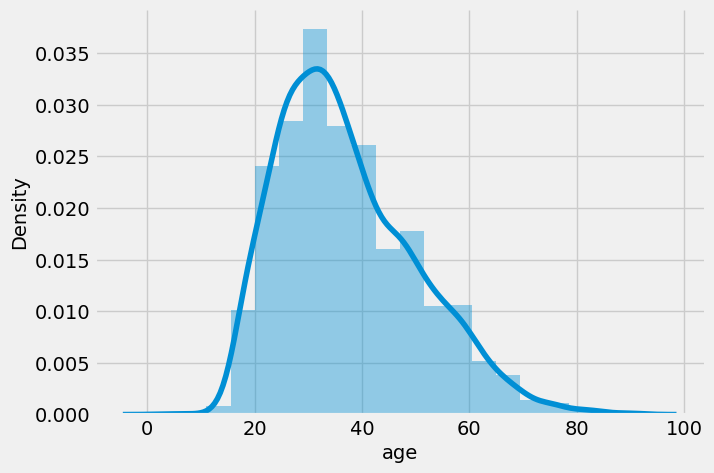

In [18]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(data['age'], bins =20)

Из графика видно, что чаще всего смерти подвержены люди 30-35 лет.

In [23]:
data.groupby(['gender','manner_of_death'])['manner_of_death'].count()

gender  manner_of_death 
F       shot                 338
        shot and Tasered      10
M       shot                7032
        shot and Tasered     329
Name: manner_of_death, dtype: int64

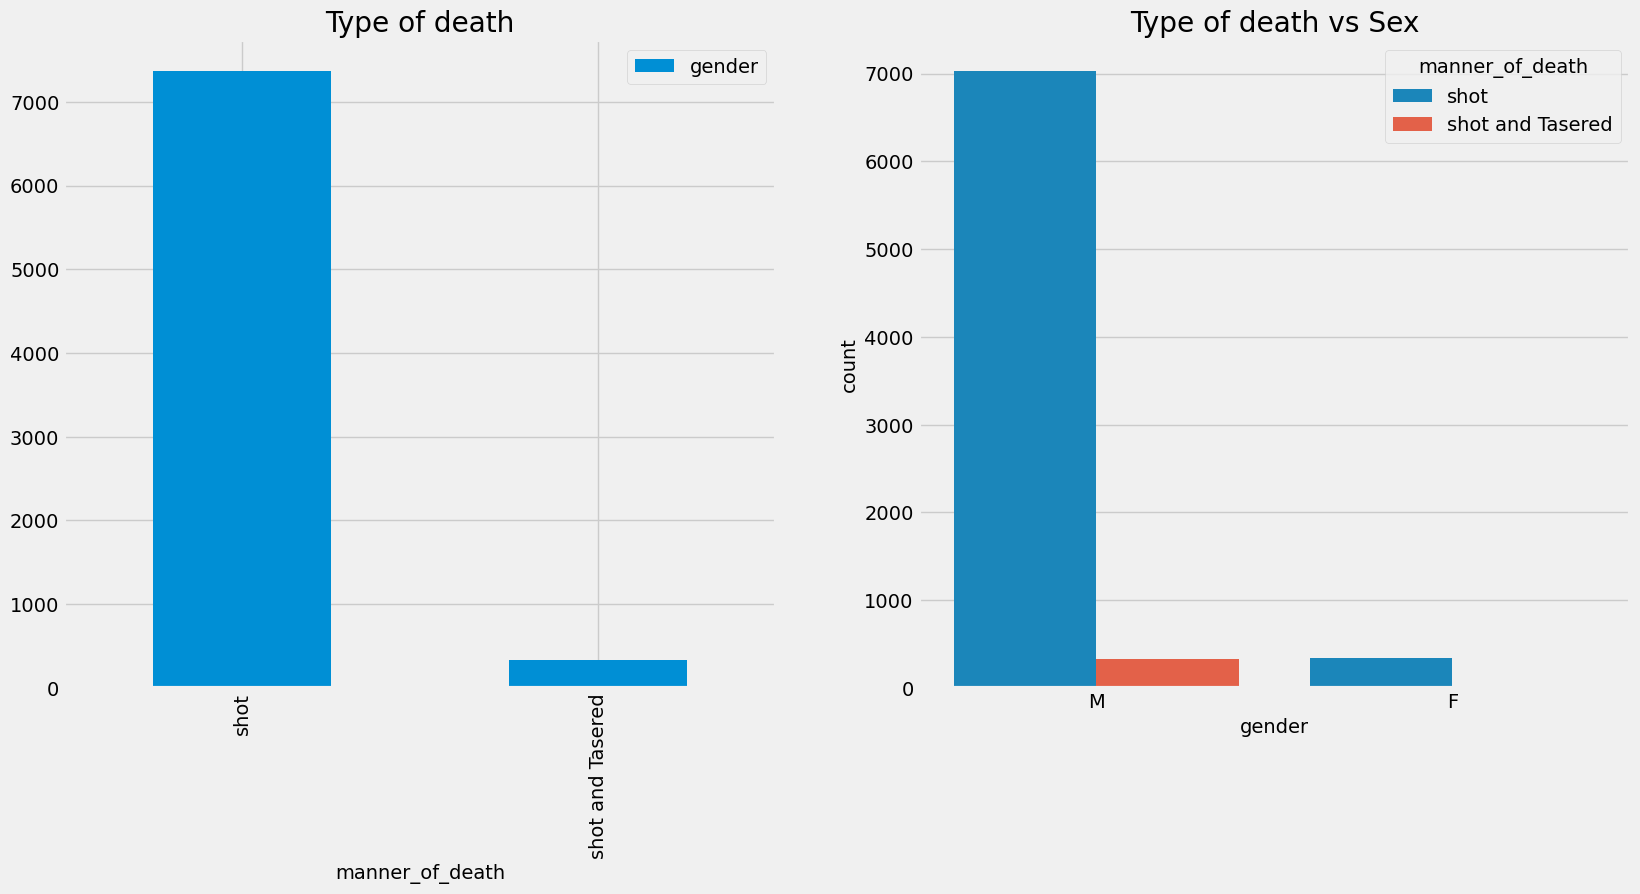

In [39]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['gender','manner_of_death']].groupby(['manner_of_death']).count().plot.bar(ax=ax[0])
ax[0].set_title('Type of death')
sns.countplot(x='gender',hue='manner_of_death',data=data, ax=ax[1])
ax[1].set_title('Type of death vs Sex')
plt.show()

По этим графикам очевидно, что наболее распространенный тип убийства - выстрел, причем и у женщин и у мужчин.

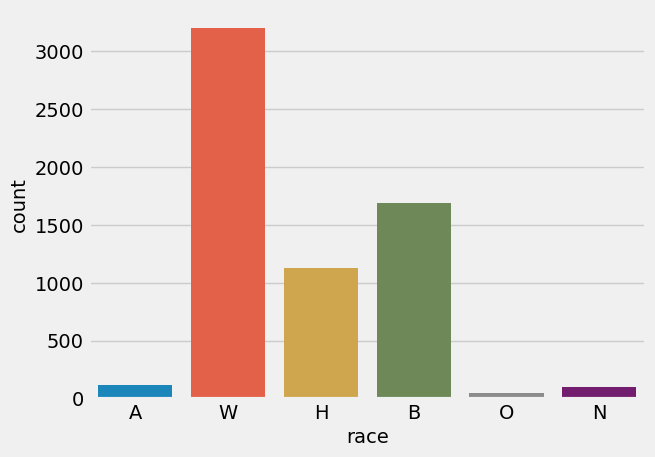

In [119]:
sns.countplot(x= 'race', data=data)
plt.show()

Белые люди чаще чем люди других рас попадают в смертельно опасные ситуации.

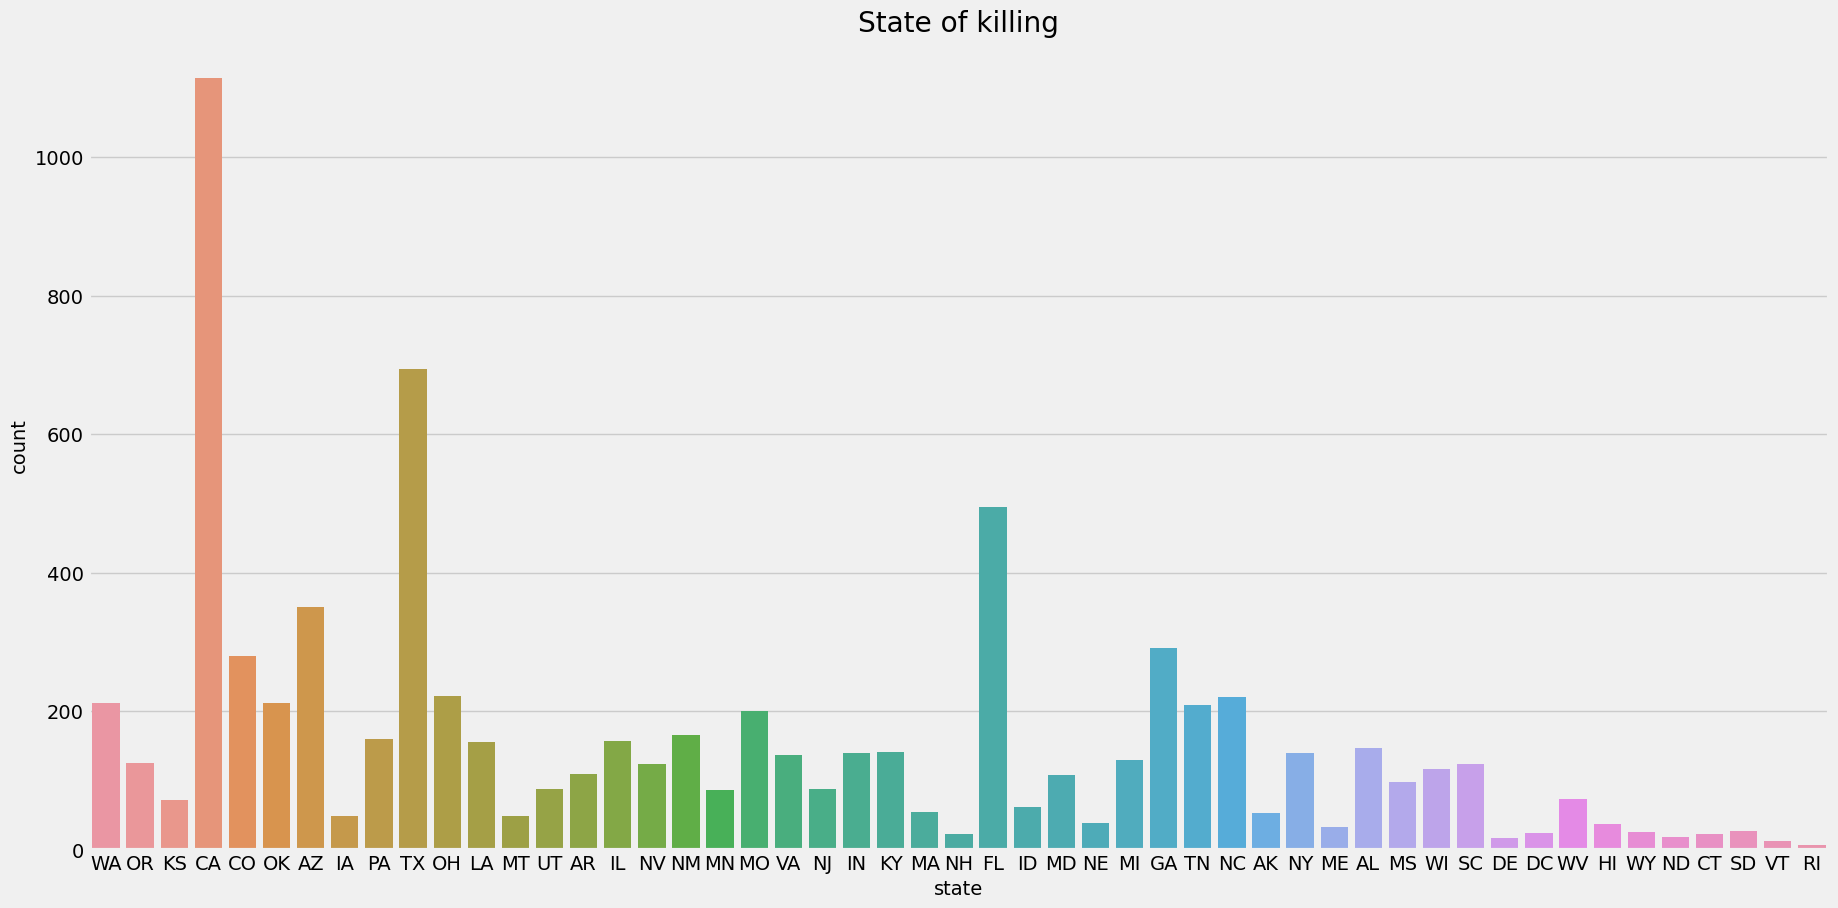

In [152]:
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.countplot(x = data.state)
ax.set_title('State of killing')
plt.show()

Очевидно, что штаты CA, TX, FL, AZ и GA являются наиболее опасными для белого мужчины 30-35 лет.

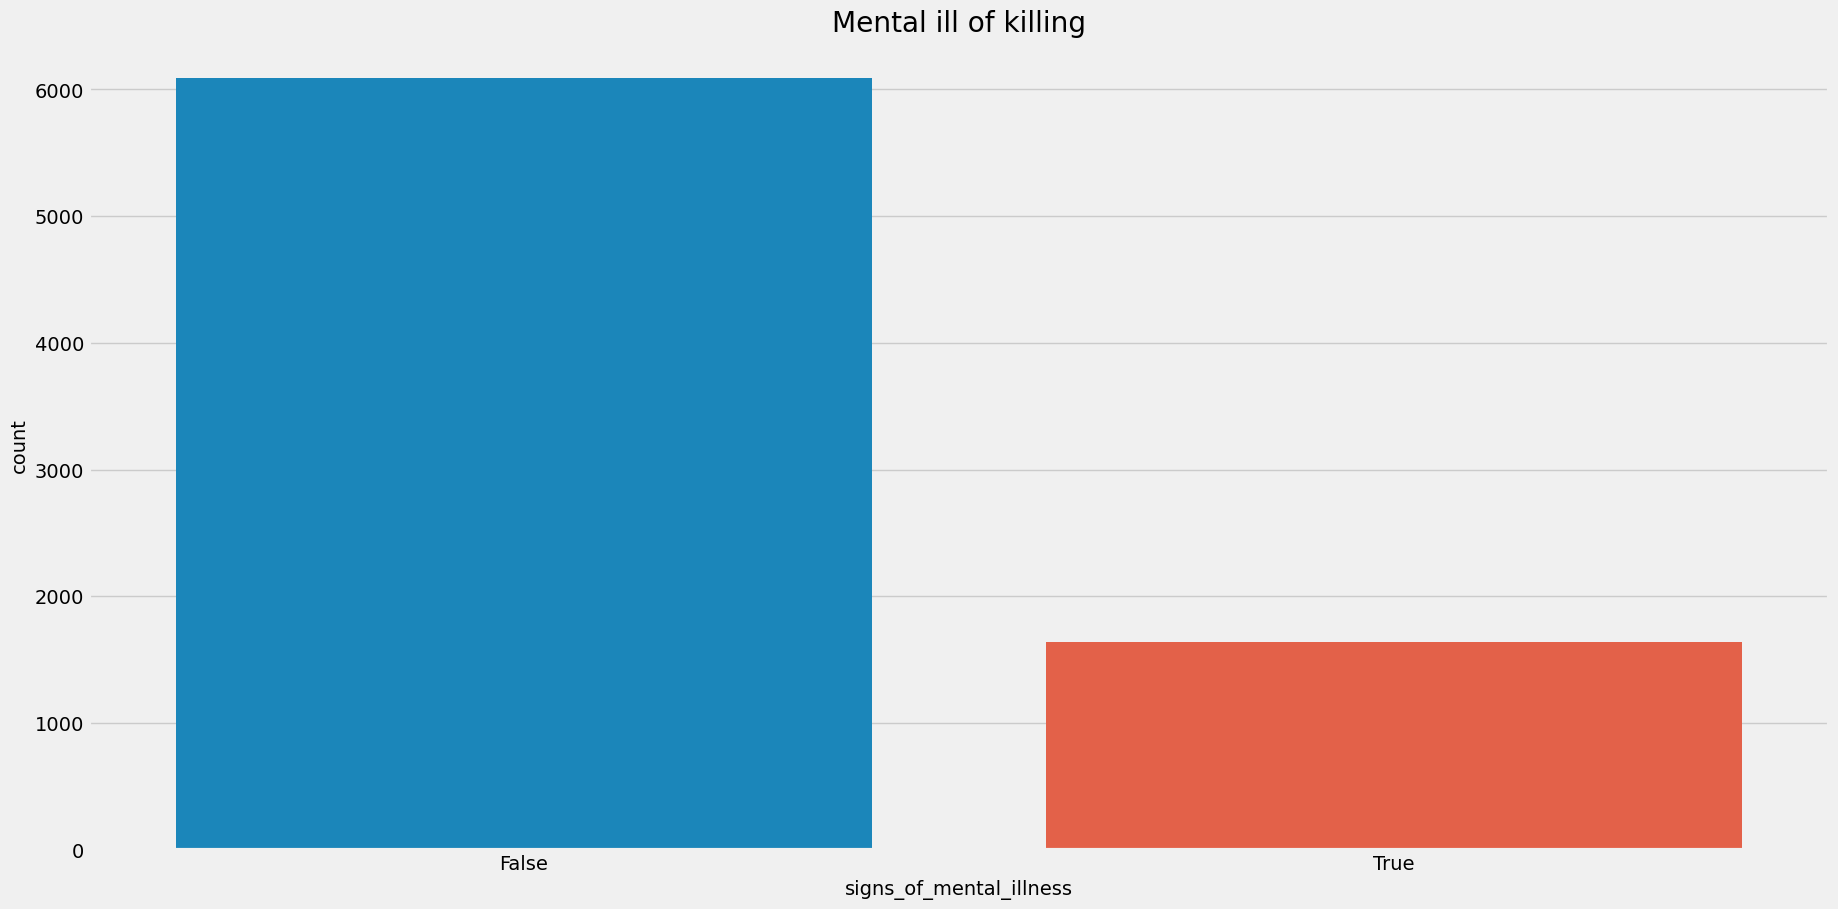

In [157]:
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.countplot(x = data.signs_of_mental_illness)
ax.set_title('Mental ill of killing')
plt.show()

По данному соотношению, видно, что большая часть убитых людей была без признаков психических заболеваний.

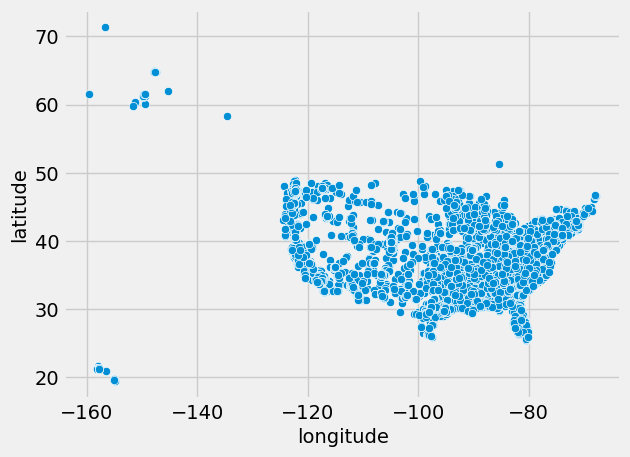

In [158]:
sns.scatterplot(y=data[data['is_geocoding_exact']==True].latitude, x=data[data['is_geocoding_exact']==True].longitude)
plt.show()


По данному распределению убийст по территории США(и не только), можно рассмотреть наиболее плотно насыщенную убийствами часть страны - восточная и юго-восточная.

Подводя итоги анализа данного дата-сета, можно сказать, что наиболее часто встречающаяся смерть - это смерть белого мужчины, в результате выстрела пистолета. Наиболее смертельный возраст - 30-35 лет. А территории штатов СА, TX, FL, AZ и GA - наиболее опасные. На счет признаков психических заболеваний можно сказать, что если признаки есть - это априори неприятно, но если и их нет - это не спасет жизнь. 